# Теория вероятностей и математическая статистика (семинары)
# Урок 9. Линейная регрессия Логистическая регрессия

## 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

b1 = 2.6205388824027653
b = 2.620538882402765
b0 = 444.1773573243596
y_pred = [535.89621821 562.10160703 942.07974498 968.2851338  548.99891262
 627.61507909 585.68645697 837.25818968 758.64202321 732.43663439]


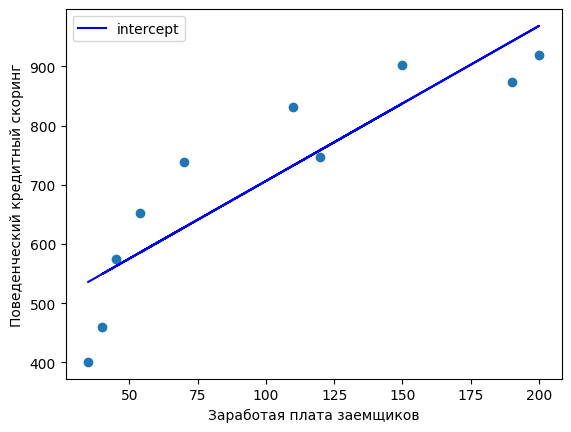

In [23]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])


n = len(zp)

# x = zp
# y = ks

b1 = (n*np.sum(zp*ks) - np.sum(ks) * np.sum(zp)) / (n * np.sum(zp**2) - np.sum(zp)**2)
print(f'b1 = {b1}')

# второй способ:

b1 = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp ** 2) - np.mean(zp) ** 2)
print(f'b = {b1}')


b0 = np.mean(ks) - b1*np.mean(zp)
print(f'b0 = {b0}')

y_pred = b0 + b1 * zp
print(f'y_pred = {y_pred}')

plt.scatter(zp, ks)
plt.plot(zp, y_pred, c = 'b', label = 'intercept')
plt.legend()
plt.xlabel('Заработая плата заемщиков')
plt.ylabel('Поведенческий кредитный скоринг', rotation = 90)
plt.show()





b = 5.889820420132689
y_pred = [ 206.1437147   265.04191891 1119.06587983 1177.96408403  235.59281681
  412.28742941  318.05030269  883.47306302  706.77845042  647.88024621]


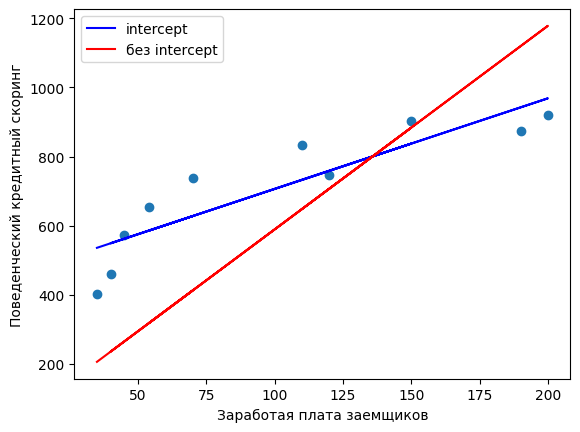

In [24]:
zp1 = zp.reshape(1, n)
ks1 = ks.reshape(1, n)

b1 = np.dot(np.dot(np.linalg.inv(np.dot(zp1, zp1.T)), zp1), ks1.T)[0][0]
print(f'b = {b1}')

y_pred1 = b1 * zp
print(f'y_pred = {y_pred1}')

plt.scatter(zp, ks)
plt.plot(zp, y_pred, 'b', label = 'intercept')
plt.plot(zp, y_pred1, 'r', label = 'без interсept')
plt.legend()
plt.xlabel('Заработая плата заемщиков')
plt.ylabel('Поведенческий кредитный скоринг', rotation = 90)
plt.show()


## 2.Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [25]:
def mse(b, y, x):
    return np.sum((b * x - y) ** 2) / len(x)

def mse_p(b,x,y):
    return (2 / len(x)) * np.sum((b * x - y) * x)

a = 1e-6
b = 0.1

iteration = 10000
for i in range(iteration):
    b -= a * mse_p(b, zp, ks)
    if i % 500 == 0:
        print(f'Итерация #{i}, b={b}, mse={mse(b, zp, ks)}')

print(f'Коэффициент линейной регрессии (без intercept): {b}')

Итерация #0, b=0.25952808000000005, mse=7655.730737357037
Итерация #500, b=5.889815595583751, mse=17597187.848422274
Итерация #1000, b=5.8898204201285544, mse=17597217.4376979
Итерация #1500, b=5.889820420132673, mse=17597217.437723156
Итерация #2000, b=5.889820420132673, mse=17597217.437723156
Итерация #2500, b=5.889820420132673, mse=17597217.437723156
Итерация #3000, b=5.889820420132673, mse=17597217.437723156
Итерация #3500, b=5.889820420132673, mse=17597217.437723156
Итерация #4000, b=5.889820420132673, mse=17597217.437723156
Итерация #4500, b=5.889820420132673, mse=17597217.437723156
Итерация #5000, b=5.889820420132673, mse=17597217.437723156
Итерация #5500, b=5.889820420132673, mse=17597217.437723156
Итерация #6000, b=5.889820420132673, mse=17597217.437723156
Итерация #6500, b=5.889820420132673, mse=17597217.437723156
Итерация #7000, b=5.889820420132673, mse=17597217.437723156
Итерация #7500, b=5.889820420132673, mse=17597217.437723156
Итерация #8000, b=5.889820420132673, mse=175

## 3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [26]:
def mse_(b0, b1, y = ks, X = zp, n = 10):
    return np.sum((b0 + b1 * X - y) ** 2) / n

def mse_b0(b0, b1, x, y): 
    return 2 * np.sum((b0 + b1 * x) - y) / len(x)

def mse_b1(b0, b1, x, y):
    return 2 * np.sum(((b0 + b1 * x) - y) * x) / len(x)


a = 5e-5

b0 = 0.1
b1 = 0.1

for i in range(1000000):
    y_pred3 = b0 + b1 * zp
    b0 -=a * mse_b0(b0, b1, zp, ks)
    b1 -=a * mse_b1(b0, b1, zp, ks)
    if i % 100000 == 0:
        print(f"Итерация: {i}, b0 : {b0}, b1 : {b1}, , mse: {mse_(b0,b1)}")

print(f"Коэффициенты линейной регрессии: b0 = {b0}, b1 = {b1}")

Итерация: 0, b0 : 0.169966, b1 : 8.07468054476, , mse: 122318.06397097567


Итерация: 100000, b0 : 409.0442373734796, b1 : 2.879127619051743, , mse: 6783.521961452364
Итерация: 200000, b0 : 441.3974680483413, b1 : 2.6409995775222037, , mse: 6472.374468908443
Итерация: 300000, b0 : 443.95740007610897, b1 : 2.622157823932053, , mse: 6470.426473787141
Итерация: 400000, b0 : 444.159953325044, b1 : 2.6206669802831115, , mse: 6470.414278011555
Итерация: 500000, b0 : 444.1759802422447, b1 : 2.6205490180788695, , mse: 6470.414201657699
Итерация: 600000, b0 : 444.17724836347435, b1 : 2.6205396843827113, , mse: 6470.41420117967
Итерация: 700000, b0 : 444.17734870288626, b1 : 2.6205389458590114, , mse: 6470.414201176682
Итерация: 800000, b0 : 444.1773566421911, b1 : 2.6205388874236997, , mse: 6470.41420117666
Итерация: 900000, b0 : 444.177357270376, b1 : 2.6205388828000986, , mse: 6470.414201176658
Коэффициенты линейной регрессии: b0 = 444.17735732000256, b1 = 2.6205388824348343
